In [355]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [356]:
full_medals = pd.read_csv('data/full_medal_data.csv')

In [337]:
sport_data = pd.read_csv('data/sport_data.csv')

total_bronze_medals = sport_data.groupby(['Sport', 'Year']).sum('Bronze')['Bronze']
total_silver_medals = sport_data.groupby(['Sport', 'Year']).sum('Silver')['Silver']
total_gold_medals = sport_data.groupby(['Sport', 'Year']).sum('Gold')['Gold']

In [338]:
for i in range(len(sport_data)):
    sport = sport_data.loc[i, 'Sport']
    year = sport_data.loc[i, 'Year']
    sport_data.loc[i, 'Bronze Total'] = total_bronze_medals.loc[(sport, year)]
    sport_data.loc[i, 'Silver Total'] = total_silver_medals.loc[(sport, year)]
    sport_data.loc[i, 'Gold Total'] = total_gold_medals.loc[(sport, year)]

sport_data['Bronze %'] = sport_data['Bronze'] / sport_data['Bronze Total']
sport_data['Silver %'] = sport_data['Silver'] / sport_data['Silver Total']
sport_data['Gold %'] = sport_data['Gold'] / sport_data['Gold Total']

In [390]:
sport_data = sport_data.sort_values(['NOC', 'Year']).reset_index(drop=True)


rolling_window = 3
sport_data['Bronze RA'] = sport_data.groupby(['NOC', 'Sport'])['Bronze'].transform(lambda x: x.rolling(window=rolling_window, min_periods=1).mean().shift(1))
sport_data['Silver RA'] = sport_data.groupby(['NOC', 'Sport'])['Silver'].transform(lambda x: x.rolling(window=rolling_window, min_periods=1).mean().shift(1))
sport_data['Gold RA'] = sport_data.groupby(['NOC', 'Sport'])['Gold'].transform(lambda x: x.rolling(window=rolling_window, min_periods=1).mean().shift(1))
sport_data['Total RA'] = sport_data.groupby(['NOC', 'Sport'])['Total Medals'].transform(lambda x: x.rolling(window=rolling_window, min_periods=1).mean().shift(1))

sport_data['Bronze % RA'] = sport_data.groupby(['NOC', 'Sport'])['Bronze %'].transform(lambda x: x.rolling(window=rolling_window, min_periods=1).mean().shift(1))
sport_data['Silver % RA'] = sport_data.groupby(['NOC', 'Sport'])['Silver %'].transform(lambda x: x.rolling(window=rolling_window, min_periods=1).mean().shift(1))
sport_data['Gold % RA'] = sport_data.groupby(['NOC', 'Sport'])['Gold %'].transform(lambda x: x.rolling(window=rolling_window, min_periods=1).mean().shift(1))

sport_data['Mean Participants'] = sport_data.groupby('NOC')[['Participants']].rolling(window=lookback_period+1, min_periods=1).mean().reset_index()['Participants']
sport_data['Std Dev Participants'] = sport_data.groupby('NOC')[['Participants']].rolling(window=lookback_period+1, min_periods=1).std().reset_index()['Participants']

sport_data['Normalized Participants'] = (sport_data['Participants'] - sport_data['Mean Participants']) / sport_data['Std Dev Participants']

sport_data['Female %'] = sport_data['Female Participants'] / sport_data['Participants']

sport_data = sport_data.fillna(0)
sport_data

,Year,NOC,Sport,Bronze,Silver,Gold,Total Medals,Participants,Male Participants,Female Participants,...,Gold RA,Total RA,Bronze % RA,Silver % RA,Gold % RA,Mean Participants,Std Dev Participants,Normalized Participants,Female %,Host Continent
875,1896,AUS,Athletics,3,0,5,8,1,1,0,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
876,1896,AUS,Tennis,1,0,0,1,1,1,0,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
877,1900,AUS,Aquatics,0,0,3,3,1,1,0,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
878,1900,AUS,Athletics,9,0,1,10,1,1,0,...,5.00,8.00,0.09,0.00,0.14,1.00,0.00,0.00,0.00,0.00
879,1904,AUS,Aquatics,1,9,0,10,1,1,0,...,3.00,3.00,0.00,0.00,0.10,1.00,0.00,0.00,0.00,0.00
880,1904,AUS,Athletics,0,0,0,0,1,1,0,...,3.00,9.00,0.14,0.00,0.08,1.00,0.00,0.00,0.00,0.00
881,1906,AUS,Aquatics,3,0,0,3,1,1,0,...,1.50,6.50,0.01,0.09,0.05,1.00,0.00,0.00,0.00,0.00
882,1906,AUS,Athletics,3,0,0,3,3,3,0,...,2.00,6.00,0.09,0.00,0.05,1.67,1.15,1.15,0.00,0.00
883,1920,AUS,Aquatics,5,9,0,14,6,5,1,...,1.00,5.33,0.05,0.06,0.03,3.33,2.52,1.06,0.17,0.00
884,1920,AUS,Athletics,0,2,0,2,4,4,0,...,0.33,4.33,0.08,0.00,0.00,4.33,1.53,-0.22,0.00,0.00


In [381]:
sex = pd.read_csv('data/summerOly_athletes.csv')[['NOC', 'Year', 'Sex']].sort_values(by=['NOC', 'Year']).reset_index(drop=True)
sex = sex.groupby(['NOC', 'Year'])['Sex'].apply(lambda x: (x == 'M').mean()).reset_index()
events = pd.read_csv('data/summerOly_programs.csv').loc[71].reset_index()[4:].rename(columns={'index': 'Year', 71: 'Events'}).astype({'Events': 'int32'})
events['Year'] = events['Year'].str.replace('*', '')
events['Difference'] = events['Events'].diff().fillna(0)
events = events.astype({'Year': 'int32'}).reset_index(drop=True)

for i in range(len(events)):
    full_medals.loc[full_medals['Year'] == events.loc[i, 'Year'], 'Events Difference'] = events.loc[i, 'Difference']
    

full_medals = full_medals.sort_values(by=['Country Code', 'Year']).reset_index(drop=True)


countries = full_medals['Country Code'].unique()
for country_name in countries:
    country = full_medals[full_medals['Country Code'] == country_name]
    diff = country[['Team Size']].diff().fillna(0)

    full_medals.loc[full_medals['Country Code'] == country_name, 'Team Size Diff'] = diff.loc[:, 'Team Size']

    full_medals.loc[full_medals['Country Code'] == country_name, 'Rolling Mean Team Size'] = full_medals[['Team Size']].rolling(window=5, min_periods=1).mean().loc[:, 'Team Size']
    full_medals.loc[full_medals['Country Code'] == country_name, 'Rolling Dev Team Size'] = full_medals[['Team Size']].rolling(window=5, min_periods=1).std().loc[:, 'Team Size']
    
    full_medals.loc[full_medals['Country Code'] == country_name, 'Rolling Mean Participated Events'] = full_medals[['Participated Events']].rolling(window=5, min_periods=1).mean().loc[:, 'Participated Events']
    full_medals.loc[full_medals['Country Code'] == country_name, 'Rolling Dev Participated Events'] = full_medals[['Participated Events']].rolling(window=5, min_periods=1).std().loc[:, 'Participated Events']

full_medals['Events Participation Share'] = full_medals['Participated Events'] / full_medals['Total Events']

full_medals['Normalized Team Size'] = (full_medals['Team Size'] - full_medals['Rolling Mean Team Size']) / full_medals['Rolling Dev Team Size']
full_medals['Normalized Participated Events'] = (full_medals['Participated Events'] - full_medals['Rolling Mean Participated Events']) / full_medals['Rolling Dev Participated Events']

for i in range(len(full_medals)):
    sex_country_yr = sex[(sex['NOC'] == full_medals.loc[i,'Country Code']) & (sex['Year'] == full_medals.loc[i,'Year'])]
    if len(sex_country_yr) == 0:
        continue
    full_medals.loc[i,'Sex'] = sex_country_yr.iloc[0, 2]
full_medals = full_medals.fillna(0).reset_index(drop=True)
display(full_medals.columns.values)
full_medals[full_medals['Country Code'] == 'AUS']

array(['Rank', 'NOC', 'Gold', 'Silver', 'Bronze', 'Total', 'Year',
       'Country Code', 'Is_Host', 'Ex-Host', 'Host Continent',
       'Team Size', 'Participated Events', 'Total Events',
       'Events Difference', 'Team Size Diff', 'Rolling Mean Team Size',
       'Rolling Dev Team Size', 'Rolling Mean Participated Events',
       'Rolling Dev Participated Events', 'Events Participation Share',
       'Normalized Team Size', 'Normalized Participated Events', 'Sex'],
      dtype=object)

,Rank,NOC,Gold,Silver,Bronze,Total,Year,Country Code,Is_Host,Ex-Host,...,Events Difference,Team Size Diff,Rolling Mean Team Size,Rolling Dev Team Size,Rolling Mean Participated Events,Rolling Dev Participated Events,Events Participation Share,Normalized Team Size,Normalized Participated Events,Sex
147,8,Australia,2,0,0,2,1896,AUS,0,0,...,0.00,0.00,4.20,1.48,4.00,1.22,0.12,0.54,0.82,1.00
148,9,Australia,2,0,3,5,1900,AUS,0,0,...,54.00,1.00,4.60,1.67,4.40,1.52,0.06,0.84,1.06,1.00
149,12,Australia,0,3,1,4,1904,AUS,0,0,...,-2.00,0.00,5.00,1.73,4.80,1.64,0.06,0.58,0.73,1.00
150,16,Australia,0,2,1,3,1920,AUS,0,0,...,54.00,23.00,9.60,10.97,7.60,6.58,0.12,1.77,1.73,0.90
151,11,Australia,3,1,2,6,1924,AUS,0,0,...,-30.00,31.00,21.20,23.93,13.40,11.41,0.25,1.62,1.54,0.98
152,19,Australia,1,2,1,4,1928,AUS,0,0,...,-17.00,-31.00,26.00,22.21,17.60,11.41,0.24,0.14,0.74,0.76
153,11,Australia,3,1,1,5,1932,AUS,0,0,...,8.00,-9.00,28.80,19.82,19.80,9.52,0.15,-0.44,-0.29,0.75
154,30,Australia,0,0,1,1,1936,AUS,0,0,...,12.00,19.00,35.40,15.31,23.80,5.72,0.20,0.24,0.38,0.85
155,14,Australia,2,6,5,13,1948,AUS,0,0,...,7.00,64.00,50.20,33.06,30.40,13.09,0.38,1.60,1.65,0.83
156,9,Australia,6,2,3,11,1952,AUS,0,0,...,13.00,37.00,66.20,52.58,37.60,21.01,0.45,1.40,1.40,0.87


In [433]:
sport_data = sport_data.drop(sport_data[sport_data['Year'] == 1906].index)
sport_data = sport_data.reset_index(drop=True)

for i in range(len(sport_data)):
    country = sport_data.loc[i, 'NOC']
    year = sport_data.loc[i, 'Year']
    sport_data.loc[i, 'Host Continent'] = full_medals.loc[(full_medals['Country Code'] == country) & (full_medals['Year'] == year), 'Host Continent'].iloc[0]
    sport_data.loc[i, 'Participated Events'] = full_medals.loc[(full_medals['Country Code'] == country) & (full_medals['Year'] == year), 'Participated Events'].iloc[0]
display(sport_data.columns.values)
sport_data

array(['Year', 'NOC', 'Sport', 'Bronze', 'Silver', 'Gold', 'Total Medals',
       'Participants', 'Male Participants', 'Female Participants',
       'Weighted Total', 'Bronze Total', 'Silver Total', 'Gold Total',
       'Bronze %', 'Silver %', 'Gold %', 'Bronze RA', 'Silver RA',
       'Gold RA', 'Total RA', 'Bronze % RA', 'Silver % RA', 'Gold % RA',
       'Mean Participants', 'Std Dev Participants',
       'Normalized Participants', 'Female %', 'Host Continent',
       'Normalized Participated Events', 'Participated Events'],
      dtype=object)

,Year,NOC,Sport,Bronze,Silver,Gold,Total Medals,Participants,Male Participants,Female Participants,...,Bronze % RA,Silver % RA,Gold % RA,Mean Participants,Std Dev Participants,Normalized Participants,Female %,Host Continent,Normalized Participated Events,Participated Events
0,1936,AFG,Athletics,0,0,0,0,2,2,0,...,0.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,4.00
1,1936,AFG,Field hockey,0,0,0,0,13,13,0,...,0.00,0.00,0.00,7.50,7.78,0.71,0.00,0.00,0.00,4.00
2,1948,AFG,Field hockey,0,0,0,0,12,12,0,...,0.00,0.00,0.00,9.00,6.08,0.49,0.00,0.00,-0.71,2.00
3,1948,AFG,Football,0,0,0,0,10,10,0,...,0.00,0.00,0.00,11.67,1.53,-1.09,0.00,0.00,-0.71,2.00
4,1956,AFG,Field hockey,0,0,0,0,12,12,0,...,0.00,0.00,0.00,11.33,1.15,0.58,0.00,0.00,-0.87,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24189,2020,ZIM,Golf,0,0,0,0,1,1,0,...,0.00,0.00,0.00,1.33,0.58,-0.58,0.00,0.00,-1.36,5.00
24190,2020,ZIM,Rowing,0,0,0,0,1,1,0,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,-1.36,5.00
24191,2024,ZIM,Aquatics,0,0,0,0,2,1,1,...,0.01,0.02,0.01,1.33,0.58,1.15,0.50,0.00,-0.77,6.00
24192,2024,ZIM,Athletics,0,0,0,0,4,3,1,...,0.00,0.00,0.00,2.33,1.53,1.09,0.25,0.00,-0.77,6.00


<Axes: >

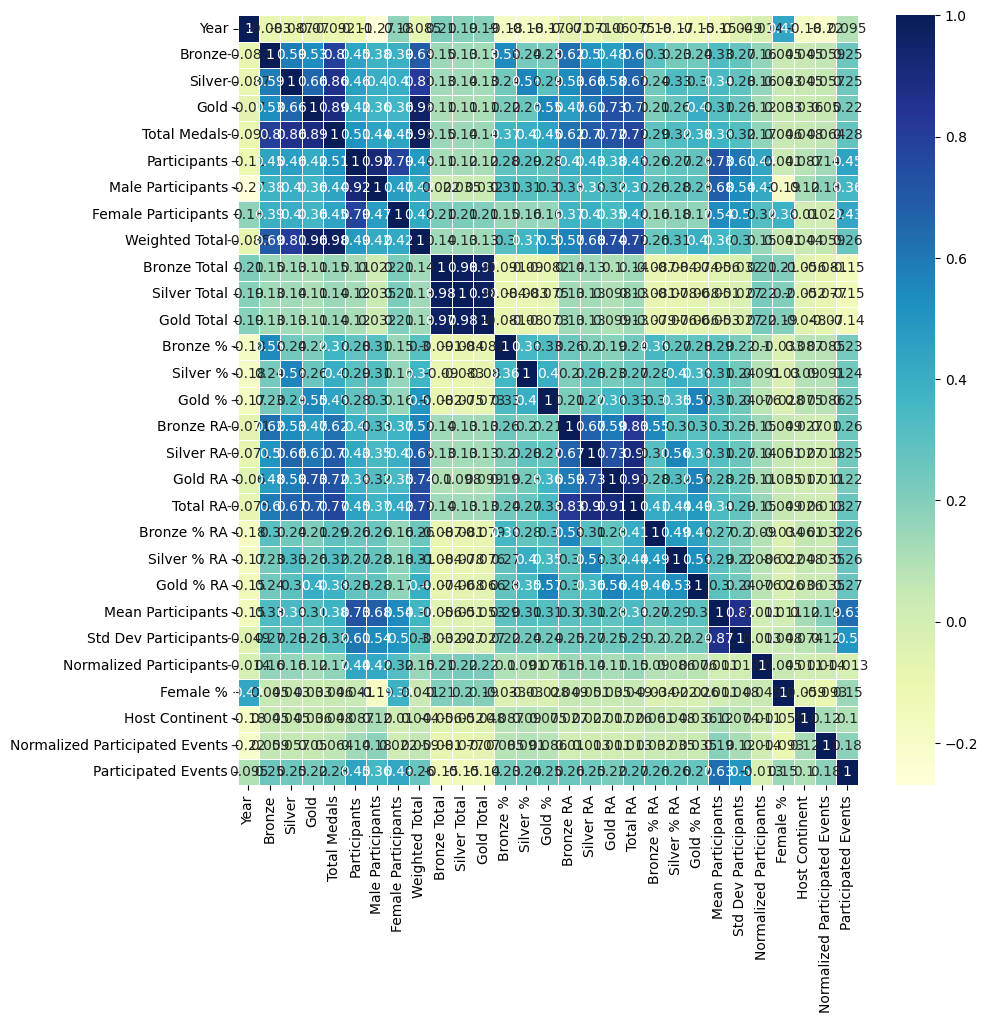

In [434]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(sport_data.corr(numeric_only=True), cmap="YlGnBu", linewidths=.5, annot=True, ax=ax)

In [403]:
import numpy as np
from sklearn.linear_model import LinearRegression


class LogitRegression(LinearRegression):

    def fit(self, x, p):
        p = np.asarray(p)
        y = np.log(p / (1 - p))
        return super().fit(x, y)

    def predict(self, x):
        y = super().predict(x)
        return 1 / (np.exp(-y) + 1)

In [435]:
from sklearn.linear_model import LinearRegression

X = sport_data[['Bronze RA', 'Silver RA', 'Gold RA', 'Total RA', 'Participants', 'Participated Events']].to_numpy()
y = sport_data[['Total Medals']].to_numpy().flatten()
# y = 1 / (1 + np.exp((-6 * y) - 3))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

reg = LinearRegression().fit(X, y)
print(reg.coef_)
reg.score(X, y)

[0.02885788 0.18190241 0.35290276 0.56366305 0.28455772 0.00162711]


0.6348204367717187

In [436]:
import numpy as np
from sklearn.datasets import load_linnerud
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import Ridge
X = sport_data[['Bronze RA', 'Silver RA', 'Gold RA', 'Total RA', 'Participants']].to_numpy()
y = sport_data[['Bronze', 'Silver', 'Gold']].to_numpy()
reg = MultiOutputRegressor(Ridge(random_state=123)).fit(X, y)
reg.score(X, y)

0.5003827340062026

In [405]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [406]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [412]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 2])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

In [420]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(sport_data[['Bronze RA', 'Silver RA', 'Gold RA', 'Normalized Participants', 'Female %', 'Participants', 'Host Continent', 'Normalized Participated Events']].to_numpy())

dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_4 (Normalization) │ (24194, 8)             │            17 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17 (72.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 17 (72.00 B)

In [421]:
history = dnn_model.fit(
    sport_data[['Bronze RA', 'Silver RA', 'Gold RA', 'Normalized Participants', 'Female %', 'Participants', 'Host Continent', 'Normalized Participated Events']].to_numpy(),
    sport_data[['Bronze', 'Silver', 'Gold']].to_numpy(),
    validation_split=0.2,
    verbose=0, epochs=100)

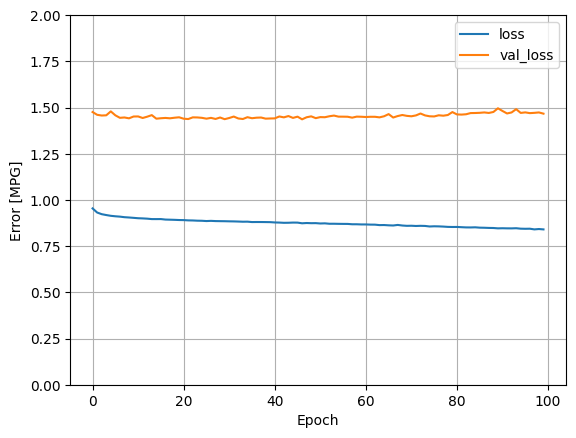

In [422]:
plot_loss(history)